<small><i>(c) December 2020 - Based on September 2016. This notebook was created by [Oriol Pujol Vila](http://www.maia.ub.es/~oriol).</i></small>

# Clustering. K-Means and DBSCAN

Many clustering algorithms are related to inferences of multiple gaussians. In this notebook we will work on some approaches regarding clustering starting with a very classic algorithm **k-means** and we will move from that to more interesting techniques to finally move towards Gaussian mixture models.

## 1. About clustering

Partition unlabeled examples into disjoint subsets of clusters, such that:

+ Examples within a cluster are similar (high intra-class similarity)
+ Examples in different clusters are different (low inter-class similarity)

It can help in discovering new categories in an unsupervised manner (no sample category labels provided).

This task has many application in different domains:

+ Group genes that perform the same function
+ Group individuals that has similar political view
+ Categorize documents of similar topics
+ Market segmentation/ building customer profiles for market analysis
+ Social network analysis
+ Astronomical data analysis
+ Compression 
+ Detection of near duplicates
+ Grouping related stock quotes for investment portfolio management
+ Building a code book of prototype samples for supervised learning algorithms

### Important questions in clustering

+ What is a natural grouping among these objects? 
    + Definition of "groupness"
    + What makes objects “related”? 
    + Definition of "similarity/distance"
+ Representation for objects 
    + Vector space? Normalization?
+ How many clusters?
    + Fixed a priori?
    + Completely data driven?
    + Avoid “trivial” clusters - too large or small

## 1.1 K-means algorithm

The K-means algorithm looks at the problem of identifying groups, or clusters of data points in a multidimensional space. Our goal is to partition the space in $K$ clusters. In k-means, the clusters are represented by $k$ prototypes $\{m^{(k)}\}$. We may think about these prototypes as the centers of the clusters. 

Our goal is twofold:
+ Find the values of the prototypes.
+ Find the assignment of the points in the space given the prototypes.

Let us model these two quantities. First, let us model the assignment rule by defining a `responsibility` variable, that tells us that a point belongs to a certain cluster,


$$r_n^{(k)} = \left\{\begin{align}1 & \quad \text{if}\; x_n\in c_k\\ 0 &\quad \text{otherwise} \end{align}\right.$$


Now we can define the *objective function*. In k-means this is a measure that models the fact that elements in one cluster have small intra-cluster distance compared with the distance to elements in the rest of the clusters. We can formulate the objective as 

$$\underset{r,\mu}{\text{minimize}}\quad \sum_{k=1}^K\sum_{i=1}^N r_i^{(k)}\|x_i-m^{(k)}\|^2$$

The solution of this problem can be done by iterating two steps, similar to a block coordinate optimization or an alternating projections technique, in which you solve first for one while keeping the other fixed, and then you optimize the other based on the former solution. 

In this case we may choose an initial value of the prototypes $\{m^{(k)}\}$ and then alternate the following steps:
+ **Step E:** We minimize the objective with respect to $r_i^{(k)}$ keeping the values of the prototypes fixed.
+ **Step M:** We minimize the objective with respect to $\{m^{(k)}\}$ keeping the values of the responsibilities fixed.

This technique as explained in this context is a protoform of a more general approach commonly called **Expectation Maximization (EM)**, where the expectation step **E** and the maximization step **M** alternates.

In the context of k-means, solving the **E** step corresponds to assign the points to the nearest prototype, thus

$$r_n^{(k)} = \left\{\begin{align}1 & \quad \text{if}\; k = \arg\min_j \|x_n-m^{(j)}\|^2\\ 0 &\quad \text{otherwise} \end{align}\right.$$

The **M** step correspondes to optimizing with respect to $\{m^{(k)}\}$, if we take derivatives and set them to zero, we obtain
$$-2\sum_{i=1}^N  r_i^{(k)}(x_i-m^{(k)})=0$$
which gives

$$m^{(k)} = \frac{\sum_n r_n^{(k)}x_n}{\sum_i r_i^{(k)}}$$

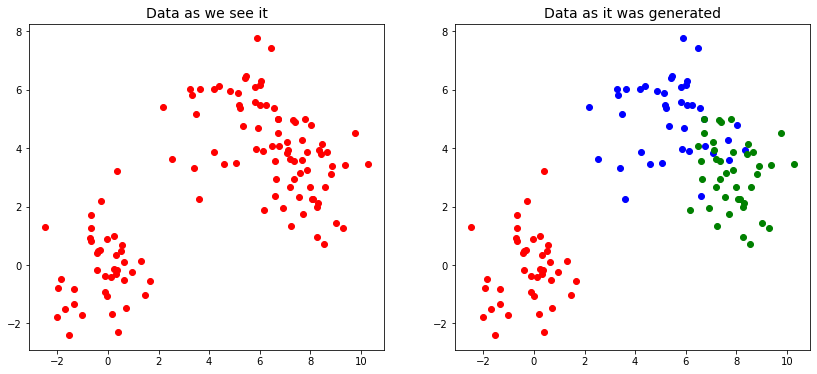

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#Create some data
MAXN=40
X = np.concatenate([1.25*np.random.randn(MAXN,2),5+1.5*np.random.randn(MAXN,2)]) 
X = np.concatenate([X,[8,3]+1*np.random.randn(MAXN,2)])

#Just for visualization purposes
y = np.concatenate([np.ones((MAXN,1)),2*np.ones((MAXN,1))])
y = np.concatenate([y,3*np.ones((MAXN,1))])

plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],color='r')
plt.title('Data as we see it', size=14)

plt.subplot(1,2,2)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')
plt.title('Data as it was generated',size=14)
fig=plt.gcf()
fig.set_size_inches((14,6))

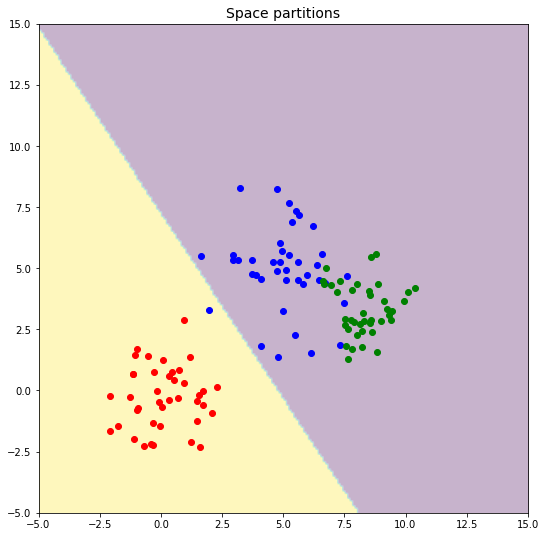

In [48]:
from sklearn import cluster

K=2
clf = cluster.KMeans(init='random', n_clusters=K)
clf.fit(X)

plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')

x = np.linspace(-5,15,200)
XX,YY = np.meshgrid(x,x)
sz=XX.shape
data=np.c_[XX.ravel(),YY.ravel()]

Z=clf.predict(data)
plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=0, vmax=K-1)
plt.title('Space partitions', size=14)
fig = plt.gcf()
fig.set_size_inches((9,9))

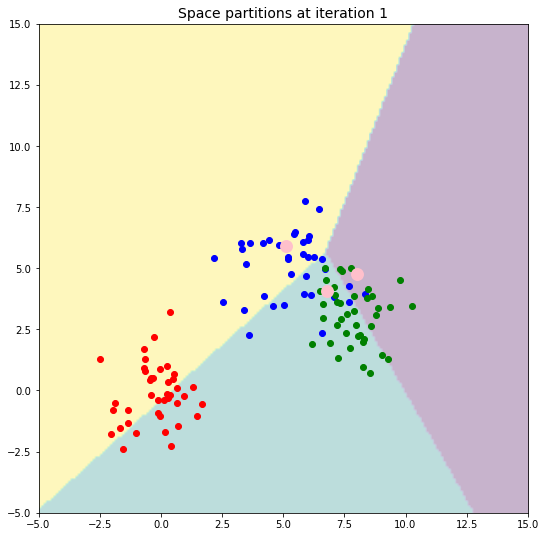

In [2]:
from sklearn import cluster
from scipy.spatial.distance import cdist
K=3

#Select the three centroids: the first three elements of the data
j = 42
C=X[j:j+3,:]

plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')
plt.scatter(C[:,0],C[:,1],s=120, 
           facecolors='pink', 
           linewidths=2,
           zorder=10)

x = np.linspace(-5,15,200)
XX,YY = np.meshgrid(x,x)
sz=XX.shape
data=np.c_[XX.ravel(),YY.ravel()]
Y = cdist(data, C, 'euclidean')
Z = np.argmin(Y,axis=1)
plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=0, vmax=K-1)
plt.title('Space partitions at iteration 1', size=14)
fig = plt.gcf()
fig.set_size_inches((9,9))

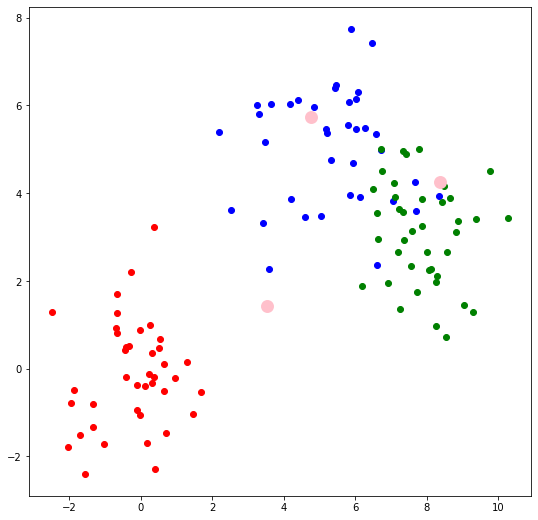

In [3]:
#Compute membership for next iteration
Y = cdist(X, C, 'seuclidean')
y_pred = np.argmin(Y,axis=1)

#Update centroids
for i in range(K):
    C[i,:]=np.mean(X[y_pred==i,:],axis=0)

plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')
plt.scatter(C[:,0],C[:,1],s=120, 
           facecolors='pink', 
           linewidths=2,
           zorder=10)
fig = plt.gcf()
fig.set_size_inches((9,9))

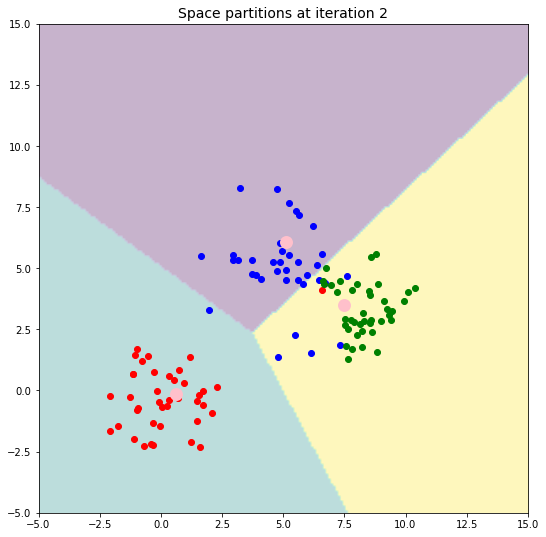

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import numpy as np
#And the new area of influence
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')
plt.scatter(C[:,0],C[:,1],s=120, 
           facecolors='pink', 
           linewidths=2,
           zorder=10)
x = np.linspace(-5,15,200)
XX,YY = np.meshgrid(x,x)
sz=XX.shape
data=np.c_[XX.ravel(),YY.ravel()]
Y = cdist(data, C, 'euclidean')
Z = np.argmin(Y,axis=1)
plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=0, vmax=K-1)
plt.title('Space partitions at iteration 2', size=14)
fig = plt.gcf()
fig.set_size_inches((9,9))

### Another problem

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import numpy as np

X = np.concatenate([1.25*np.random.randn(MAXN,2),5+1.5*np.random.randn(MAXN,2)]) 
X = np.concatenate([X,[8,3]+1*np.random.randn(MAXN,2)])

K =3
C=X[0:K,:]

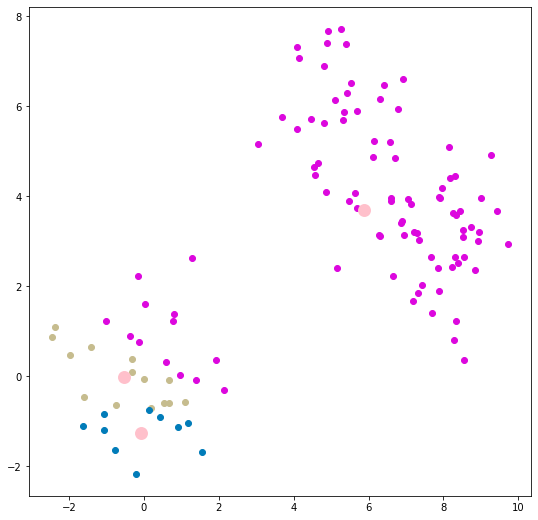

In [5]:
def kmeans_iter(X,C):
    #Compute membership for next iteration
    Y = cdist(X, C, 'seuclidean')
    y_pred = np.argmin(Y,axis=1)

    #Update centroids
    for i in range(K):
        C[i,:]=np.mean(X[y_pred==i,:],axis=0)
    return C,y_pred

        

C,y_pred = kmeans_iter(X,C)
for label in np.unique(y_pred):
    plt.scatter(X[(y_pred==label).ravel(),0],X[(y_pred==label).ravel(),1],color=[np.random.rand(),np.random.rand(),np.random.rand()])

    
plt.scatter(C[:,0],C[:,1],s=120, 
           facecolors='pink', 
           linewidths=2,
           zorder=10)
fig = plt.gcf()
fig.set_size_inches((9,9))

Lets run some times and see how we get different results. Let us move to a different dataset

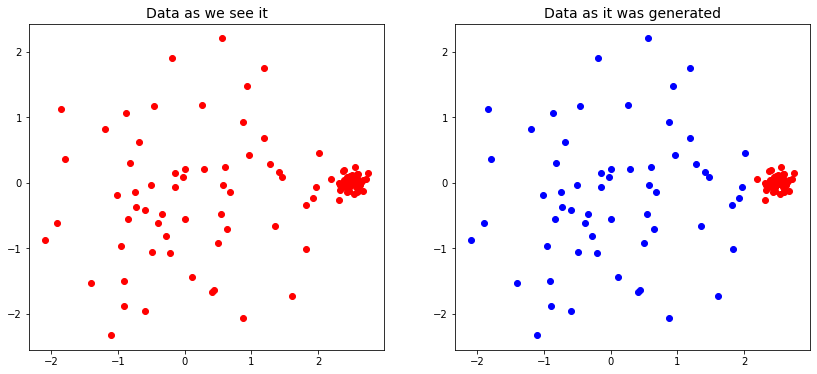

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#Create some data
MAXN=60
X = np.concatenate([[2.5,0]+0.1*np.random.randn(MAXN,2)]) 
X = np.concatenate([X,[0,0]+1*np.random.randn(MAXN,2)])

#Just for visualization purposes
y = np.concatenate([np.ones((MAXN,1))])
y = np.concatenate([y,2*np.ones((MAXN,1))])

plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],color='r')
plt.title('Data as we see it', size=14)

plt.subplot(1,2,2)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.title('Data as it was generated',size=14)
fig=plt.gcf()
fig.set_size_inches((14,6))

[0 1]


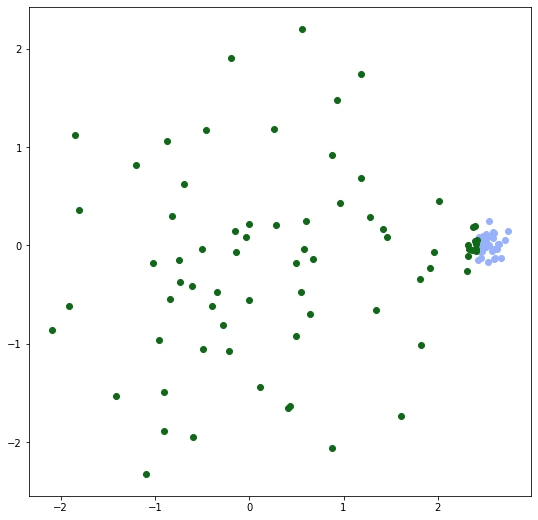

In [7]:
K =2
C=X[0:K,:]
C,y_pred = kmeans_iter(X,C)
print (np.unique(y_pred))
for label in np.unique(y_pred):
    plt.scatter(X[(y_pred==label).ravel(),0],X[(y_pred==label).ravel(),1],color=[np.random.rand(),np.random.rand(),np.random.rand()])

    
plt.scatter(C[:,0],C[:,1],s=120, 
           facecolors='none', 
           linewidths=2,
           zorder=10)
fig = plt.gcf()
fig.set_size_inches((9,9))

[0 1]


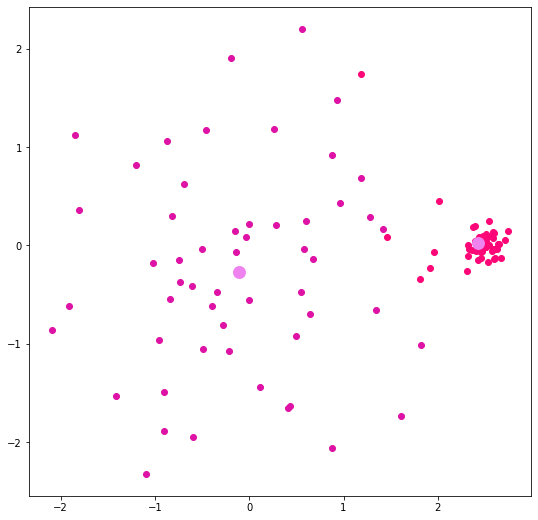

In [8]:

def kmeans_iter(X,C):
    #Compute membership for next iteration
    Y = cdist(X, C, 'seuclidean')
    y_pred = np.argmin(Y,axis=1)

    #Update centroids
    for i in range(K):
        C[i,:]=np.mean(X[y_pred==i,:],axis=0)
    return C,y_pred

        

C,y_pred = kmeans_iter(X,C)
print (np.unique(y_pred))
for label in np.unique(y_pred):
    plt.scatter(X[(y_pred==label).ravel(),0],X[(y_pred==label).ravel(),1],color=[np.random.rand(),np.random.rand(),np.random.rand()])

    
plt.scatter(C[:,0],C[:,1],s=120, 
           facecolors='violet', 
           linewidths=2,
           zorder=10)
fig = plt.gcf()
fig.set_size_inches((9,9))

We don't quite like this one.

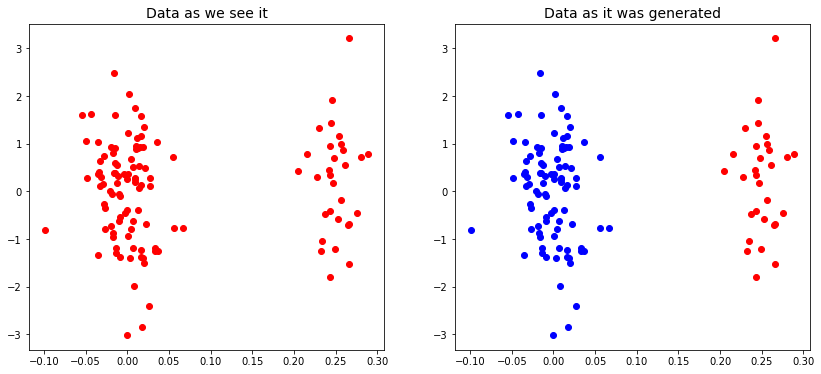

In [9]:
import numpy as np
import matplotlib.pyplot as plt
#Create some data
MAXN1=30
MAXN=90
X = np.concatenate([[0.25,0]+[0.025,1.]*np.random.randn(MAXN1,2)]) 
X = np.concatenate([X,[0,0]+[0.025,1.]*np.random.randn(MAXN,2)])

#Just for visualization purposes
y = np.concatenate([np.ones((MAXN1,1))])
y = np.concatenate([y,2*np.ones((MAXN,1))])

plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],color='r')
plt.title('Data as we see it', size=14)

plt.subplot(1,2,2)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.title('Data as it was generated',size=14)
fig=plt.gcf()
fig.set_size_inches((14,6))

In [10]:
K =2
C=X[51:51+K,:]

[0 1]


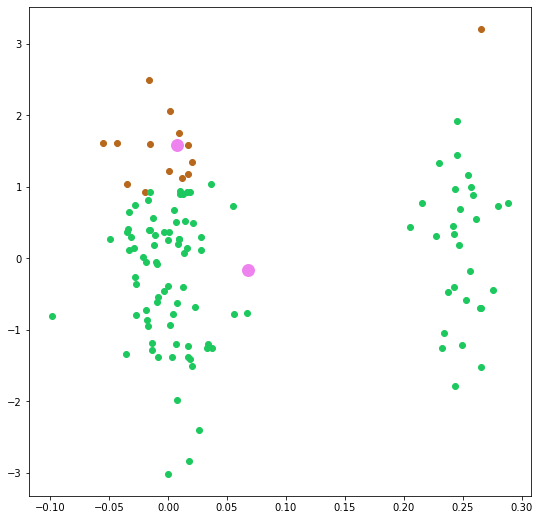

In [11]:
def kmeans_iter(X,C):
    #Compute membership for next iteration
    Y = cdist(X, C, 'seuclidean')
    y_pred = np.argmin(Y,axis=1)

    #Update centroids
    for i in range(K):
        C[i,:]=np.mean(X[y_pred==i,:],axis=0)
    return C,y_pred

        

C,y_pred = kmeans_iter(X,C)
print (np.unique(y_pred))
for label in np.unique(y_pred):
    plt.scatter(X[(y_pred==label).ravel(),0],X[(y_pred==label).ravel(),1],color=[np.random.rand(),np.random.rand(),np.random.rand()])

    
plt.scatter(C[:,0],C[:,1],s=120, 
           facecolors='violet', 
           linewidths=2,
           zorder=10)
fig = plt.gcf()
fig.set_size_inches((9,9))

<div class = "alert alert-success" style="border-radius:10px">**EXERCISE: ** How we can improve this algorithm?</div>

<div class = "alert alert-warning" style="border-radius:10px">**FOR THE LECTURER: ** 
Assuming that assuming that data comes from a mixture of gaussians with teh same covariance matrix. Spherical gaussians. And all of them have the same prior probability.
Kmeans is roughly Maximum a posteriori that adjust the assignment variables "k_n" which cluster the nth point cames from and the means to maximize the posterior probalbility.

We can change the assumptions.
</div>

## 1.2 Soft k-means
We set a stiffness parameter $\beta$ and we change the assignment rule considering the similarity to each of the means. Observe that the similarity is now defined with respect to all possible means, this is each point resebles something to each mean. This will mean that all data contribute to the assignment.

$$r_k^{(n)} = \frac{e^{-\beta d(x^{(n)},m^{(k)})}}{\sum_i e^{-\beta d(x_n,m_i)}}$$

The sum of the responsibilities of the k means for each point adds to one.

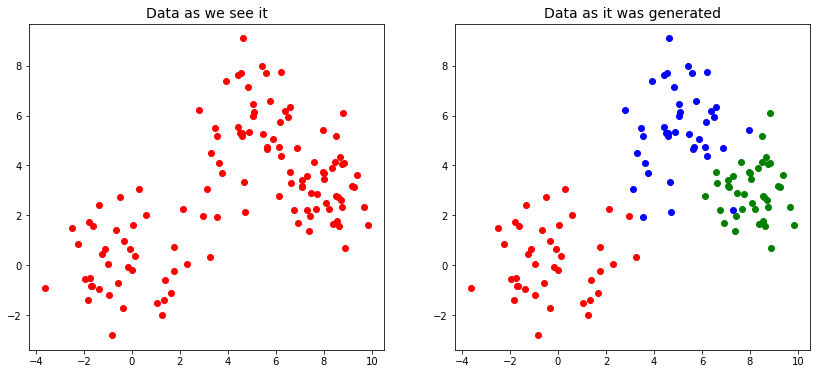

In [98]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#Create some data
MAXN=40
X = np.concatenate([1.25*np.random.randn(MAXN,2),5+1.5*np.random.randn(MAXN,2)]) 
X = np.concatenate([X,[8,3]+1*np.random.randn(MAXN,2)])

#Just for visualization purposes
y = np.concatenate([np.ones((MAXN,1)),2*np.ones((MAXN,1))])
y = np.concatenate([y,3*np.ones((MAXN,1))])

plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],color='r')
plt.title('Data as we see it', size=14)

plt.subplot(1,2,2)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')
plt.title('Data as it was generated',size=14)
fig=plt.gcf()
fig.set_size_inches((14,6))

[[-0.84378123 -2.79778015]
 [ 1.75559164  0.74054667]
 [ 2.13002732  2.23674903]
 [-1.70698498 -0.83087163]
 [-0.01353833 -0.19298383]
 [ 2.30838064  0.05609757]
 [-1.38789762 -0.9631212 ]
 [-0.56516464 -0.7026743 ]
 [-1.74647725 -0.51183167]
 [-0.08867681  0.63071553]
 [ 1.2357916  -1.98662745]
 [ 1.73439703 -0.21948642]
 [ 0.28017779  3.05188049]
 [ 0.12745791  0.36809525]
 [-1.10552456  0.66893473]
 [ 0.57165526  1.99767064]
 [-0.97581111  0.04821592]
 [-1.35302726  2.42649164]
 [ 0.0543612   1.61976484]
 [ 3.24672396  0.34670314]
 [ 1.31785253 -1.41302397]
 [-0.15011026 -0.08143647]
 [-0.66887499  1.42473441]
 [-0.93849076 -1.19930899]
 [-0.3511673  -1.73445743]
 [-0.31606747  0.96318469]
 [-1.67639884 -0.83587939]
 [-0.51288428  2.71733915]
 [ 1.03625588 -1.51516545]
 [-1.96546013 -0.54319594]
 [-3.61577902 -0.91958435]
 [-2.48845998  1.48392602]
 [-1.78593741  1.7170492 ]
 [-1.81927617 -1.40130755]
 [ 2.95214279  1.98316265]
 [-2.24829544  0.85724313]
 [ 1.38138738 -0.61008564]
 

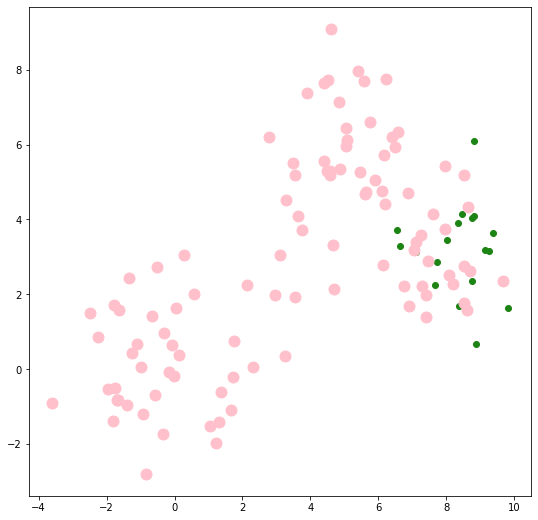

In [121]:
K =100
C=X[0:K,:].copy()
print (C)
for label in np.unique(y):
    plt.scatter(X[(y==label).ravel(),0],X[(y==label).ravel(),1],color=[np.random.rand(),np.random.rand(),np.random.rand()])

    
plt.scatter(C[:,0],C[:,1],s=120, 
           facecolors='pink', 
           linewidths=1,
           zorder=10)
fig = plt.gcf()
fig.set_size_inches((9,9))

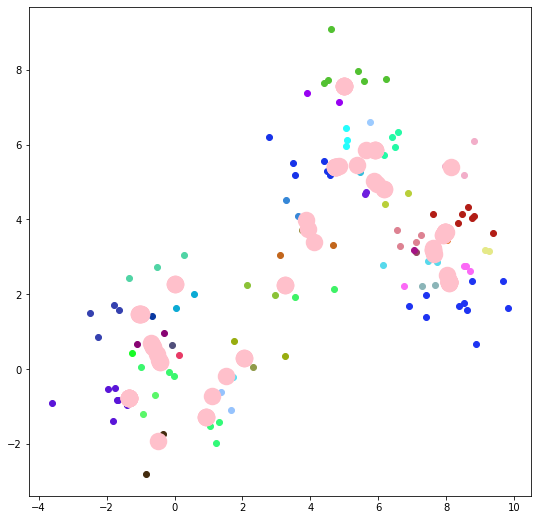

In [122]:
from scipy.spatial.distance import cdist

def soft_kmeans_iter(X,C,beta):
    #Compute membership for next iteration
    d = cdist(X, C, 'seuclidean')
    r = np.exp(-beta*d)
    r = r/(np.dot(np.sum(r, axis=1)[:,np.newaxis],np.ones((1,K)))+1e-16)
    #Update centroids
    for i in range(K):
        for dim in range(C.shape[1]):
            C[i,dim] = np.sum(X[:,dim]*r[:,i])/(np.sum(r[:,i])+1e-16)
    return C,r

        
beta=5.
for iter in range(100):
    C,r = soft_kmeans_iter(X,C,beta)
y_pred = np.argmax(r,axis=1)
for label in np.unique(y_pred):
    plt.scatter(X[(y_pred==label).ravel(),0],X[(y_pred==label).ravel(),1],color=[np.random.rand(),np.random.rand(),np.random.rand()])

    
plt.scatter(C[:,0],C[:,1],s=max(1200/beta,120), 
           facecolors='pink', 
           linewidths=2,
           zorder=10)
fig = plt.gcf()
fig.set_size_inches((9,9))

In [123]:
C

array([[-0.49167493, -1.93197081],
       [ 2.04856819,  0.29548526],
       [ 3.26655049,  2.24208818],
       [-1.33599552, -0.78692622],
       [-0.43543322,  0.18146554],
       [ 2.04850106,  0.29541569],
       [-1.33599551, -0.78692622],
       [-1.33599509, -0.78692624],
       [-1.33599552, -0.78692622],
       [-0.6251459 ,  0.57311505],
       [ 0.93033486, -1.27581661],
       [ 1.50509403, -0.18672021],
       [ 0.02265906,  2.26478002],
       [-0.5296827 ,  0.39922678],
       [-0.66028715,  0.63576098],
       [ 0.02556316,  2.2596621 ],
       [-0.45736859,  0.23367879],
       [-0.98488513,  1.465465  ],
       [-0.97512758,  1.4658116 ],
       [ 2.04858848,  0.29550628],
       [ 0.93033493, -1.27581647],
       [-0.43942791,  0.19078327],
       [-1.00987449,  1.46479811],
       [-1.33599546, -0.78692622],
       [-1.3359949 , -0.78692625],
       [-0.68993405,  0.69964659],
       [-1.33599552, -0.78692622],
       [ 0.0230854 ,  2.26401577],
       [ 0.93033489,

<div class = "alert alert-success" style = "border-radius:10px">**EXERCISE: ** Change the parameter $K$, and the parameter $\beta$. Describe what happens. </div>

We can think of $\beta = 1/\sigma^2$

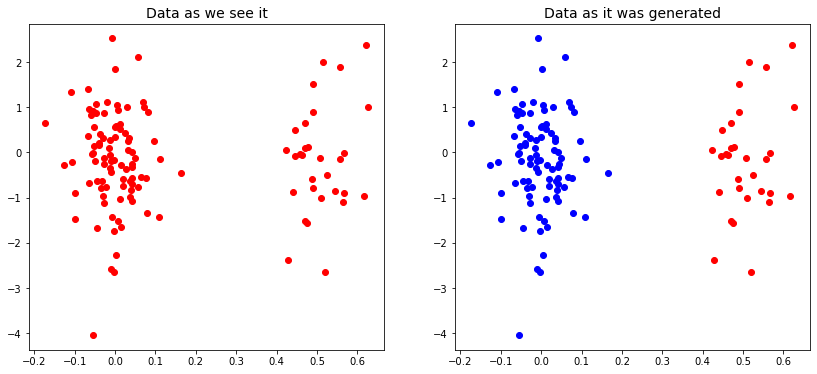

In [129]:
import numpy as np
import matplotlib.pyplot as plt
#Create some data
MAXN1=30
MAXN=90
X = np.concatenate([[0.5,0]+[0.05,1.]*np.random.randn(MAXN1,2)]) 
X = np.concatenate([X,[0,0]+[0.05,1.]*np.random.randn(MAXN,2)])

#Just for visualization purposes
y = np.concatenate([np.ones((MAXN1,1))])
y = np.concatenate([y,2*np.ones((MAXN,1))])

plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],color='r')
plt.title('Data as we see it', size=14)

plt.subplot(1,2,2)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.title('Data as it was generated',size=14)
fig=plt.gcf()
fig.set_size_inches((14,6))

[[ 0.03756584 -0.99167158]
 [ 0.07644744 -0.56055207]]


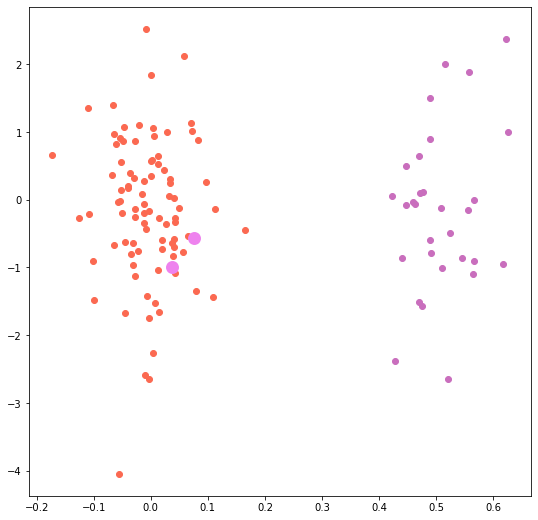

In [132]:
K =2
j = 42
C=X[j:j+K,:].copy()
print (C)
for label in np.unique(y):
    plt.scatter(X[(y==label).ravel(),0],X[(y==label).ravel(),1],color=[np.random.rand(),np.random.rand(),np.random.rand()])

    
plt.scatter(C[:,0],C[:,1],s=120, 
           facecolors='violet', 
           linewidths=2,
           zorder=10)
fig = plt.gcf()
fig.set_size_inches((9,9))

[[ 0.50743302 -0.16737249]
 [-0.00362442 -0.14695012]]


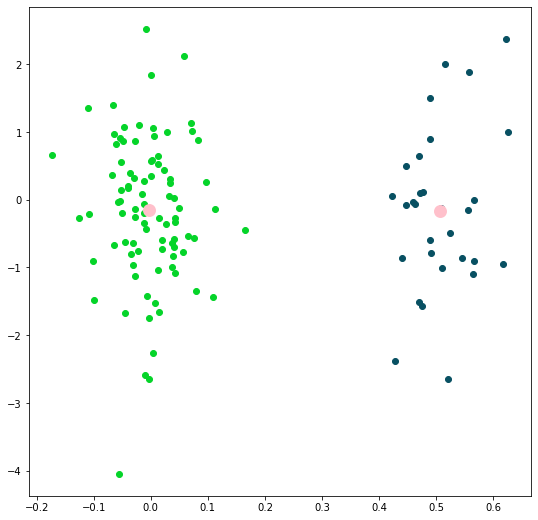

In [133]:
def soft_kmeans_iter(X,C,beta):
    #Compute membership for next iteration
    d = cdist(X, C, 'seuclidean')
    r = np.exp(-beta*d)
    r = r/(np.dot(np.sum(r, axis=1)[:,np.newaxis],np.ones((1,K)))+1e-16)
    #Update centroids
    for i in range(K):
        for dim in range(C.shape[1]):
            C[i,dim] = np.sum(X[:,dim]*r[:,i])/(np.sum(r[:,i])+1e-16)
    return C,r

        
beta=10.
for iter in range(1000):
    C,r = soft_kmeans_iter(X,C,beta)
y_pred = np.argmax(r,axis=1)
for label in np.unique(y_pred):
    plt.scatter(X[(y_pred==label).ravel(),0],X[(y_pred==label).ravel(),1],color=[np.random.rand(),np.random.rand(),np.random.rand()])

    
plt.scatter(C[:,0],C[:,1],s=max(1200/beta,120), 
           facecolors='pink', 
           linewidths=2,
           zorder=10)
fig = plt.gcf()
fig.set_size_inches((9,9))
print (C)

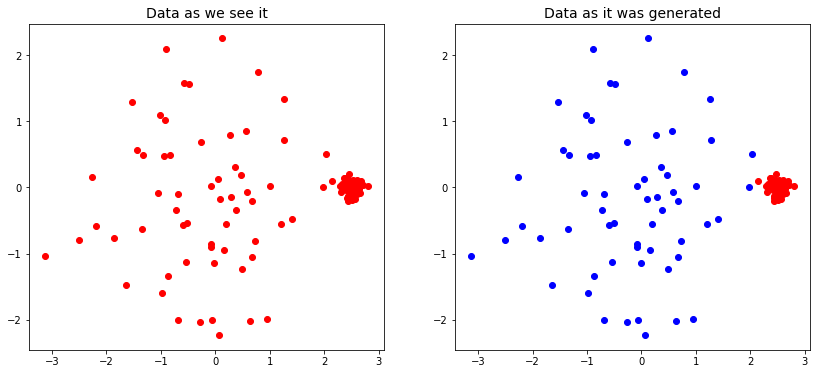

In [139]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#Create some data
MAXN=60
X = np.concatenate([[2.5,0]+0.1*np.random.randn(MAXN,2)]) 
X = np.concatenate([X,[0,0]+1*np.random.randn(MAXN,2)])

#Just for visualization purposes
y = np.concatenate([np.ones((MAXN,1))])
y = np.concatenate([y,2*np.ones((MAXN,1))])

plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],color='r')
plt.title('Data as we see it', size=14)

plt.subplot(1,2,2)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.title('Data as it was generated',size=14)
fig=plt.gcf()
fig.set_size_inches((14,6))

(2, 2)
[[ 1.99072171  0.10675466]
 [-0.3057241  -0.44021785]]


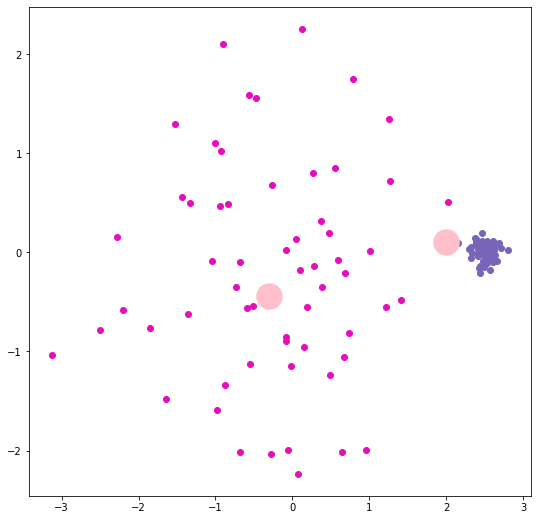

In [140]:
def soft_kmeans_iter(X,C,beta):
    #Compute membership for next iteration
    d = cdist(X, C, 'seuclidean')
    r = np.exp(-beta*d)
    r = r/(np.dot(np.sum(r, axis=1)[:,np.newaxis],np.ones((1,K)))+1e-16)
    #Update centroids
    for i in range(K):
        for dim in range(C.shape[1]):
            C[i,dim] = np.sum(X[:,dim]*r[:,i])/(np.sum(r[:,i])+1e-16)
    return C,r

K=2
        

beta=2.
C=X[:K,:]
print (C.shape)
for iter in range(1000):
    C,r = soft_kmeans_iter(X,C,beta)

print(C)
y_pred = np.argmax(r,axis=1)
for label in np.unique(y):
    plt.scatter(X[(y==label).ravel(),0],X[(y==label).ravel(),1],color=[np.random.rand(),np.random.rand(),np.random.rand()])

    
plt.scatter(C[:,0],C[:,1],s=max(1200/beta,120), 
           facecolors='pink', 
           linewidths=2,
           zorder=10)
fig = plt.gcf()
fig.set_size_inches((9,9))

We can change the standard deviation after some iterations.

# 2. Mixtures of Gaussians

From all the former examples we can easily consider a mixture of Gaussian distributions in the following form,

$$p({\bf x}) = \sum\limits_{k=1}^K \pi_k \mathcal{N}({\bf x}|\mu_k,\Sigma_k)$$

Let us derive the mixture of Gaussians from a Bayessian perspective. This will also allow us to introduce our first latent variable and the depiction of joint probability density functions in terms of graphical models.

Let us introduce a K-dimensional binary random variable ${\bf z}$ with a 1-of-K representation ($z_i = 1$ if $i=k$ and $z_i = 0$ if $i\neq k$, with $z_i\in\{0,1\}$). Observe that this random variable has just K possible random states according to which component is nonzero. 

We can define the joint distribution $p({\bf x},{\bf z}) = p({\bf x}|{\bf z})p({\bf z})$. 

<img src = "joint_distribution_pgm.jpg" width=70px>


Let us consider now the probability of $z_k$

$$p(z_k=1) = \pi_k$$

where $0\leq \pi_k \leq 1$, and $\sum_k p(z_k=1) = 1$.

Similarly, 

$$p({\bf x}|z_k=1) = \mathcal{N}({\bf x}|\mu_k,\Sigma_k)$$



Let us compute now the marginal distribution with respect to $x$, i.e. $p({\bf x}) = \sum_z p({\bf x}|{\bf z})p({\bf z})$, this is

$$p({\bf x}) = \sum\limits_{k=1}^K p(z_k=1)p({\bf x}|z_k=1)$$

Note that we are computing this value by considering all states of random variable $z_k$.

$$p({\bf x}) = \sum\limits_{k=1}^K \pi_k\mathcal{N}({\bf x}|\mu_k,\Sigma_k)$$

Great, we have just derived the same as we got at the starting point. But what is this good for? We will see in a minute that this will simplify our computational procedure.

With this representation we can ask about the posterior probability of the assignment state variable, i.e.

$$p(z_k=1|{\bf x}) = \frac{p(z_k=1)p({\bf x}|z_k=1)}{\sum\limits_{i=1}^K p(z_i=1)p({\bf x}|z_i=1)}$$

$$ = \frac{\pi_k\mathcal{N}({\bf x}|\mu_k,\Sigma_k)}{\sum\limits_{i=1}^K \pi_i\mathcal{N}({\bf x}|\mu_i,\Sigma_i)}$$

Observe that this quantity may be considered as the responsibility of that particular Gaussian distribution for generating/"explaining" observation ${\bf x}$.

## Maximum Likelihood

The maximum likelihood objective considering i.i.d. samples corresponds to the problem of 

$$\text{maximize}\quad \prod\limits_{i=1}^N p(x_i|\pi,\mu,\Sigma)$$

we can equivalently maximize the log probability,

$$\text{maximize}\quad \sum\limits_{i=1}^N \ln \{\sum\limits_{k=1}^K \pi_k \mathcal{N}({x_i|\mu_k,\Sigma_k})\}$$

We may use standard gradient based techniques, or use the alternating projections technique. In this case we will use expectation maximization.

Let us write down the conditions for solving that problem: 

- With respect to the means $\mu_k$
$$0 = \sum\limits_{k=1}^N\underset{\gamma(z_n^{(k)})}{\underbrace{\frac{\pi_k\mathcal{N}({\bf x}|\mu_k,\Sigma_k)}{\sum\limits_{i=1}^K \pi_i\mathcal{N}({\bf x}|\mu_i,\Sigma_i)}}} \Sigma^{-1}_k(x_n-\mu_k)$$

$$0 = \sum\limits_{k=1}^N \gamma(z_n^{(k)}) \Sigma^{-1}_k(x_n-\mu_k)$$

if $\Sigma$ is non singular we can rearrange terms to obtain,

$$\mu_k = \frac{1}{N_k} \sum_{n=1}^N \gamma(z_n^{(k)})x_n$$

with 

$$N_k = \sum_{n=1}^N \gamma(z_n^{(k)})$$

with respect to $\Sigma$,

$$\Sigma_k = \frac{1}{N_k}\sum_{n=1}^N \gamma(z_n^{(k)})(x_n-\mu_k)(x_n-\mu_k)^T$$

Finally, with respect to $\pi_k$,

$$\pi_k = \frac{N_k}{N}$$

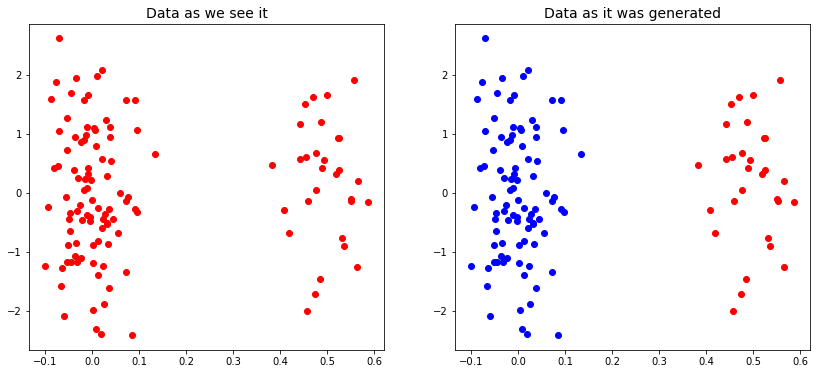

In [141]:
import numpy as np
import matplotlib.pyplot as plt
#Create some data
MAXN1=30
MAXN=90
X = np.concatenate([[0.5,0]+[0.05,1.]*np.random.randn(MAXN1,2)]) 
X = np.concatenate([X,[0,0]+[0.05,1.]*np.random.randn(MAXN,2)])

#Just for visualization purposes
y = np.concatenate([np.ones((MAXN1,1))])
y = np.concatenate([y,2*np.ones((MAXN,1))])

plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],color='r')
plt.title('Data as we see it', size=14)

plt.subplot(1,2,2)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.title('Data as it was generated',size=14)
fig=plt.gcf()
fig.set_size_inches((14,6))

[[ 0.35089893  0.367706  ]
 [-0.48462928  0.2115822 ]]


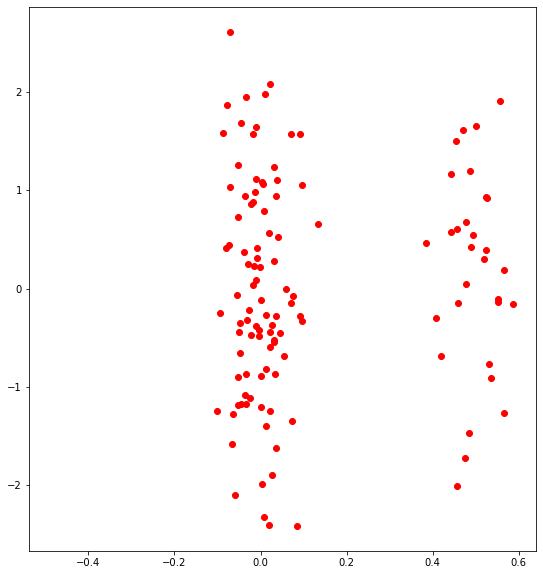

In [142]:
K =2
idx=np.random.randint(0,X.shape[0],K)
C=2*np.random.rand(K,X.shape[1])-1
Sigma=100.*np.ones((K,X.shape[1]))
Pi=(1./K)*np.ones((K,1))
print (C)
plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],color='r')
plt.scatter(C[:,0],C[:,1],s=120, 
           facecolors='none', 
           linewidths=2,
           zorder=10)
fig = plt.gcf()
fig.set_size_inches((20,10))

[[0.00123509 0.49379158]
 [0.00117529 0.63083073]] [[0.25]
 [0.75]]


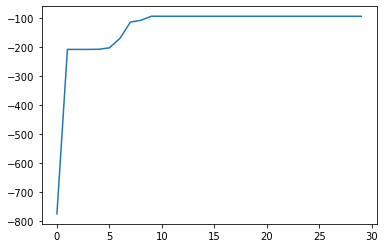

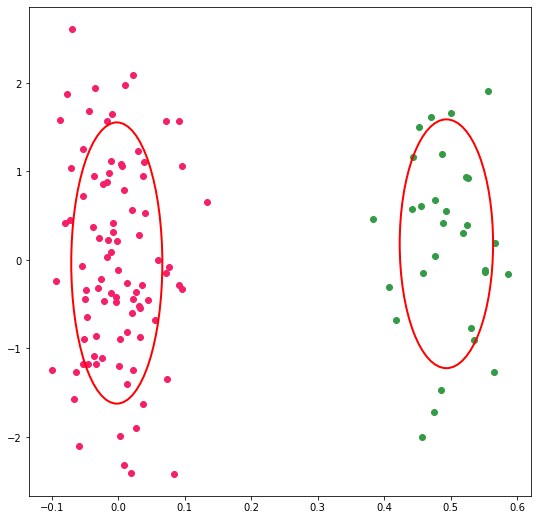

In [143]:
from scipy.stats import multivariate_normal

def define_responsibilities(X,C,Sigma,Pi):
    r = np.zeros((X.shape[0],C.shape[0]))
    for i in range(C.shape[0]):
        d = cdist(C[i,:][np.newaxis,:],X,metric='seuclidean',V=Sigma[i,:])**2
        r[:,i]=Pi[i]*np.exp(-0.5*d)/np.prod(np.sqrt(2*np.pi)*Sigma[i,:])
    r = r/np.tile(np.sum(r,axis=1)[:,np.newaxis],(1,C.shape[0]))
    return r

def soft_kmeans2_iter(X,C,Sigma,Pi):
    I=X.shape[1]
    r = define_responsibilities(X,C,Sigma,Pi)
    for k in range(C.shape[0]):
        C[k,:]=np.sum((np.tile(r[:,k][:,np.newaxis],(1,C.shape[1]))*X),axis=0)/np.sum(r[:,k])
        Sigma[k,:]= np.sum(np.tile(r[:,k][:,np.newaxis],(1,C.shape[1]))*(X-np.tile(C[k,:][np.newaxis,:],(X.shape[0],1)))**2,axis=0)/(I*np.sum(r[:,k]))
        Pi[k]=np.sum(r[:,k])/np.sum(r) 
    return C,Sigma,Pi

def evaluate_objective(X,C,Sigma,Pi):
    J=0
    for k in range(C.shape[1]):
        J += Pi[k]*multivariate_normal.pdf(X, mean=C[k,:], cov=Sigma[k,:])
    return np.sum(np.log(J))
    
conv=[]
for iter in range(30):
    conv.append(evaluate_objective(X,C,Sigma,Pi))
    C,Sigma,Pi = soft_kmeans2_iter(X,C,Sigma,Pi)
print (Sigma,Pi)

plt.figure()
plt.plot(conv)
plt.figure()
r = define_responsibilities(X,C,Sigma,Pi)
y_pred = np.argmax(r,axis=1)
for label in np.unique(y_pred):
    plt.scatter(X[(y_pred==label).ravel(),0],X[(y_pred==label).ravel(),1],color=[np.random.rand(),np.random.rand(),np.random.rand()])

    
plt.scatter(C[:,0],C[:,1],s=120, 
           facecolors='none', 
           linewidths=2,
           zorder=10)

from matplotlib.patches import Ellipse
ax = plt.gca()
ellipse = Ellipse(xy=C[0,:], width=4*np.sqrt(Sigma[0,0]), height=4*np.sqrt(Sigma[0,1]), 
                        edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse)

ellipse = Ellipse(xy=C[1,:], width=4*np.sqrt(Sigma[1,0]), height=4*np.sqrt(Sigma[1,1]), 
                        edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse)


fig = plt.gcf()
fig.set_size_inches((9,9))

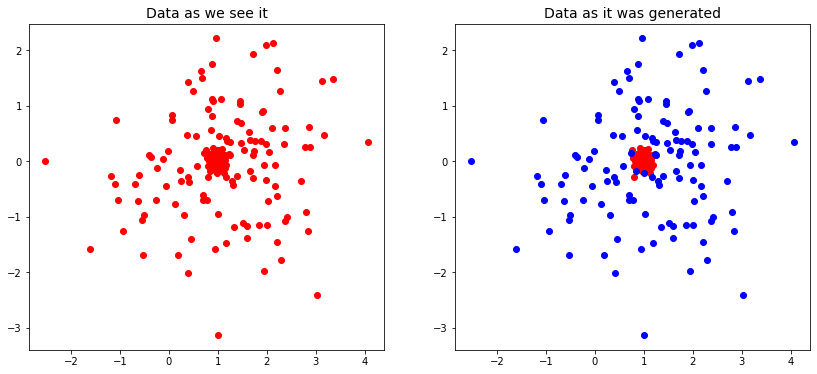

In [144]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#Create some data
MAXN=120
X = np.concatenate([[1.,0]+0.1*np.random.randn(MAXN,2)]) 
X = np.concatenate([X,[1.,0]+1*np.random.randn(MAXN,2)])

#Just for visualization purposes
y = np.concatenate([np.ones((MAXN,1))])
y = np.concatenate([y,2*np.ones((MAXN,1))])

plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],color='r')
plt.title('Data as we see it', size=14)

plt.subplot(1,2,2)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.title('Data as it was generated',size=14)
fig=plt.gcf()
fig.set_size_inches((14,6))

[[ 0.46965483 -0.00297931]
 [ 0.28933415  0.36102773]]


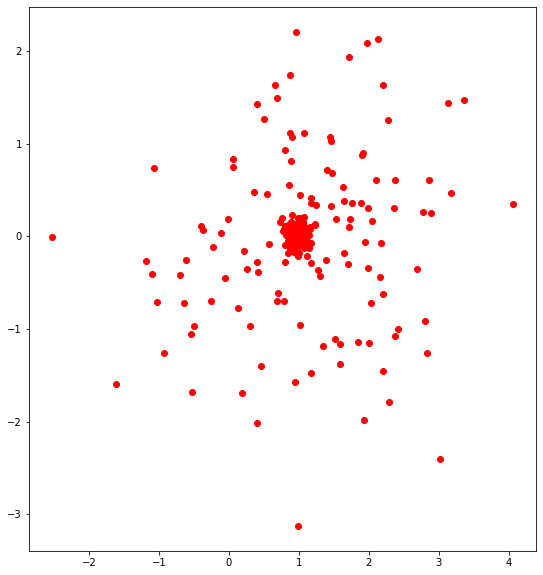

In [145]:
K =2
idx=np.random.randint(0,X.shape[0],K)
C=2*np.random.rand(K,X.shape[1])-1
Sigma=100.*np.ones((K,X.shape[1]))
Pi=(1./K)*np.ones((K,1))
print (C)
plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],color='r')
plt.scatter(C[:,0],C[:,1],s=120, 
           facecolors='none', 
           linewidths=2,
           zorder=10)
fig = plt.gcf()
fig.set_size_inches((20,10))

[[0.67610792 0.51870488]
 [0.0047511  0.0043323 ]] [[0.48933285]
 [0.51066715]]


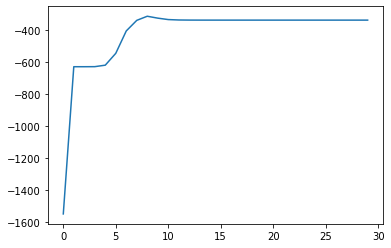

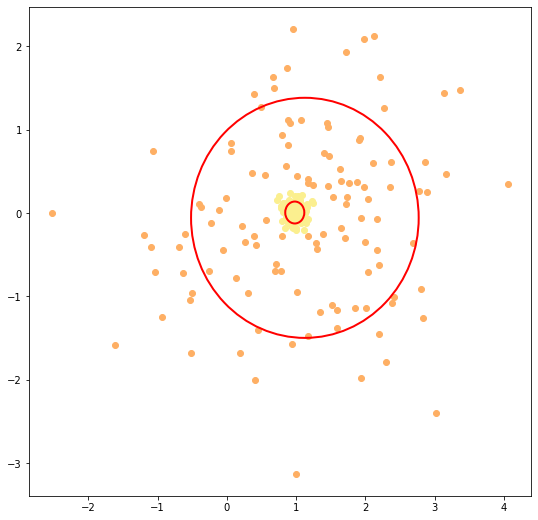

In [146]:
from scipy.stats import multivariate_normal

def define_responsibilities(X,C,Sigma,Pi):
    r = np.zeros((X.shape[0],C.shape[0]))
    for i in range(C.shape[0]):
        d = cdist(C[i,:][np.newaxis,:],X,metric='seuclidean',V=Sigma[i,:])**2
        r[:,i]=Pi[i]*np.exp(-0.5*d)/np.prod(np.sqrt(2*np.pi)*Sigma[i,:])
    r = r/np.tile(np.sum(r,axis=1)[:,np.newaxis],(1,C.shape[0]))
    return r

def soft_kmeans2_iter(X,C,Sigma,Pi):
    I=X.shape[1]
    r = define_responsibilities(X,C,Sigma,Pi)
    for k in range(C.shape[0]):
        C[k,:]=np.sum((np.tile(r[:,k][:,np.newaxis],(1,C.shape[1]))*X),axis=0)/np.sum(r[:,k])
        Sigma[k,:]= np.sum(np.tile(r[:,k][:,np.newaxis],(1,C.shape[1]))*(X-np.tile(C[k,:][np.newaxis,:],(X.shape[0],1)))**2,axis=0)/(I*np.sum(r[:,k]))
        Pi[k]=np.sum(r[:,k])/np.sum(r) 
    return C,Sigma,Pi

def evaluate_objective(X,C,Sigma,Pi):
    J=0
    for k in range(C.shape[1]):
        J += Pi[k]*multivariate_normal.pdf(X, mean=C[k,:], cov=Sigma[k,:])
    return np.sum(np.log(J))
    
conv=[]
for iter in range(30):
    conv.append(evaluate_objective(X,C,Sigma,Pi))
    C,Sigma,Pi = soft_kmeans2_iter(X,C,Sigma,Pi)
print (Sigma,Pi)

plt.figure()
plt.plot(conv)
plt.figure()
r = define_responsibilities(X,C,Sigma,Pi)
y_pred = np.argmax(r,axis=1)
for label in np.unique(y_pred):
    plt.scatter(X[(y_pred==label).ravel(),0],X[(y_pred==label).ravel(),1],color=[np.random.rand(),np.random.rand(),np.random.rand()])

    
plt.scatter(C[:,0],C[:,1],s=120, 
           facecolors='none', 
           linewidths=2,
           zorder=10)

from matplotlib.patches import Ellipse
ax = plt.gca()
ellipse = Ellipse(xy=C[0,:], width=4*np.sqrt(Sigma[0,0]), height=4*np.sqrt(Sigma[0,1]), 
                        edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse)

ellipse = Ellipse(xy=C[1,:], width=4*np.sqrt(Sigma[1,0]), height=4*np.sqrt(Sigma[1,1]), 
                        edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse)




fig = plt.gcf()
fig.set_size_inches((9,9))

<div class = "alert alert-success">**EXERCISE: ** Create a new data set with the goal of hindering the learning process and check the behavior of the method.</div>

# Density based clustering

Our last method in this notebook will be DBSCAN. In order to illustrate it we will add some spice to our problem. But before let us check on the theoretical and algorithmic basis of the technique.

Up to this point we have considered clustering as finding data groups following a notion of **compactness**. Another way of looking at what a cluster is is given by **connectivity**.

Let us check an example of the difference of both:

/Users/oriol/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


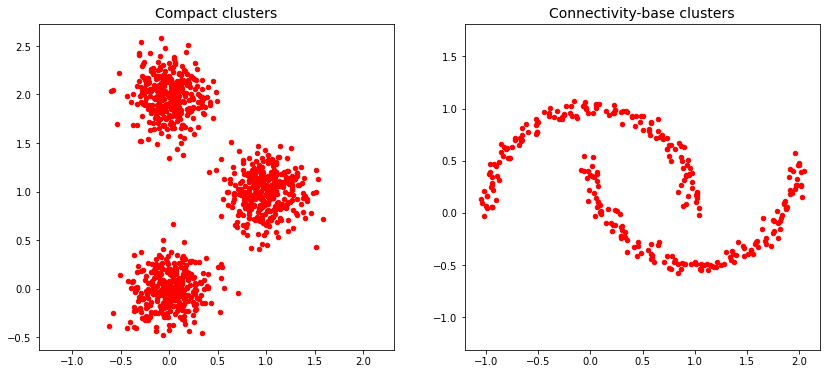

In [1]:
from sklearn.datasets.samples_generator import make_moons, make_blobs
import matplotlib.pyplot as plt

centres = [[1, 1], [0, 0], [0, 2]]
#CHANGE cluster_std=[0.2,0.2] by just 0.2
X, labels_true = make_blobs(n_samples=1000, n_features=2, centers=centres, cluster_std=0.2)
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c='r', marker='o',s=20) 
plt.axis('equal')
plt.title('Compact clusters',size=14)

[X, y] = make_moons(n_samples=300, noise=.05)
plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c='r', marker='o',s=20) 
plt.axis('equal')
plt.title('Connectivity-base clusters', size=14)
fig = plt.gcf()
fig.set_size_inches((14,6))

Let us apply our knowledge of clustering up to this point and solve the rightmost problem using k-means.

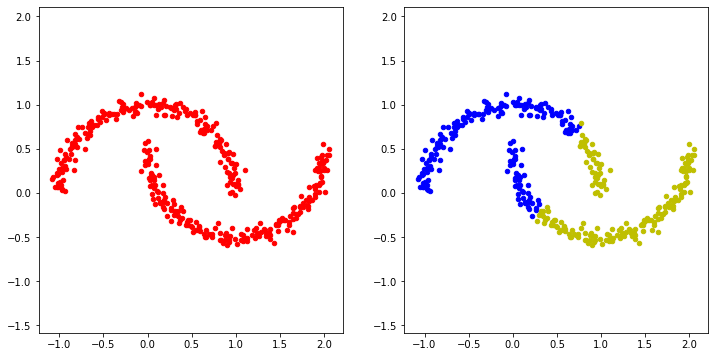

In [2]:
%reset -f
%matplotlib inline
from sklearn.datasets.samples_generator import make_moons
import matplotlib.pyplot as plt
from sklearn import cluster

# Connectivity based clustering dataset
[X, y] = make_moons(n_samples=400, noise=.05, random_state=0)
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c='r', marker='o',s=20) 
plt.axis('equal')

# Cluster using k-means
clf = cluster.KMeans(n_clusters=2,init='k-means++')
clf.fit(X)
y_pred=clf.predict(X)
plt.subplot(1,2,2)
plt.scatter(X[y_pred==0, 0], X[y_pred==0, 1], c='b', marker='o',s=20) 
plt.scatter(X[y_pred==1, 0], X[y_pred==1, 1], c='y', marker='o',s=20) 
plt.axis('equal')
fig=plt.gcf()
fig.set_size_inches((12,6))

The results are not satisfactory. K-means clusters assume that all data belonging to a cluster is close to each other. In the last example this does not happen. There are points corresponding to the same visual cluster that are far away from each other. However it is clear to us that in the two moons example there are two different clusters. In this case the notion of cluster comes from the fact that data points are somewhat connected. This notion is exploited and generalized in the so called density based methods.

Density based methods are characterized by the following properties

+ Clusters are dense regions of data separated by regions of lower data density,
+ A cluster is defined as a maximal set of densely-connected points.

With these two last properties, the methods of this family are able to discover clusters of arbitrary shape. As an example of these family of techniques we have **DBSCAN**. As advertised by its authors, 

> The DBSCAN algorithm identifies clusters in large spatial data sets by looking at the local density of database elements, using only one input parameter. Furthermore, the user gets a suggestion on which parameter value that would be suitable. Therefore, minimal knowledge of the domain is required. The DBSCAN can also determine what information should be classified as noise or outliers. In spite of this, its working process is quick and scales very well with the size of the database – almost linearly.
By using the density distribution of nodes in the database, DBSCAN can categorize these nodes into separate clusters that define the different classes. DBSCAN can find clusters of arbitrary shape. However, clusters that lie close to each other tend to belong to the same class.

In order to understand DBSCAN we have to define two concepts, namely the **neighborhood** of a data point and what **high-density** means.

The notion of **Neighborhood** can be defined as the set of points $q$ within a radius of $\epsilon$ from a query point $p$.
$$N_{\epsilon}(p) = \{q\big|\;d(p,q)\leq\epsilon\}$$

With respect to **“high density”** we can that a region of the space is densely populated if within an $\epsilon$-Neighborhood of a data point we find at least <span style="color:red">*MinPoints*</span> other data points.


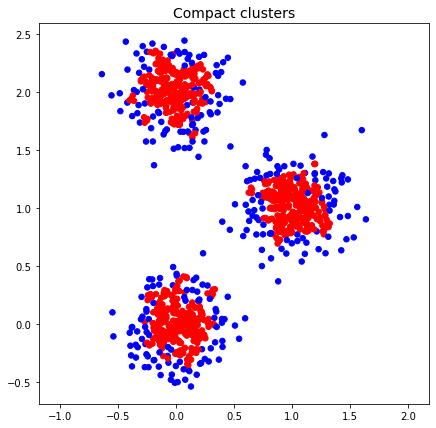

In [3]:
#Example of a set of points using minpts = 4 and check in different colors those that have high density and those who does not.
from sklearn.datasets.samples_generator import make_moons, make_blobs
import matplotlib.pyplot as plt

centres = [[1, 1], [0, 0], [0, 2]]
X, labels_true = make_blobs(n_samples=1000, centers=centres, cluster_std=0.2)

epsilon = 0.05
minpts = 4

#Create similarity matrix
from scipy.spatial.distance import pdist,squareform
import numpy as np
#Create similarity matrix
d=squareform(pdist(X,'euclidean'))
d_eps=np.where(d<epsilon,1,0)
core = np.sum(d_eps,axis=0)
colors=np.where(core>=minpts,'r','b')

plt.scatter(X[:, 0], X[:, 1], c=colors, marker='o',s=30) 
plt.axis('equal')
plt.title('Compact clusters',size=14)
plt.gcf().set_size_inches((7,7))


Observe the result in the former figure. Red points are the densely populated areas with center a certain data point. Blue points correspond to points with low population. Note that blue points are found at the "boundary" of the cluster.

Additionally, we may find data that is unconnected. We call this new type of data **outliers**. We can easily identify isolated data checking that they are only connected to themselves.

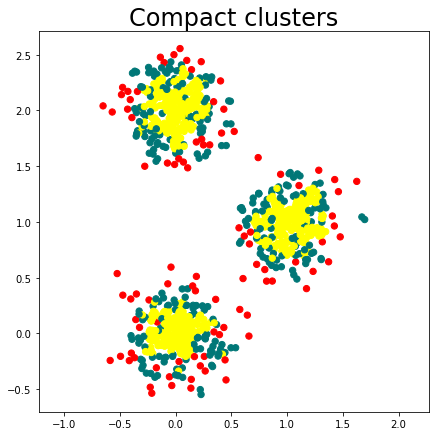

In [4]:
#Example of a set of points using minpts = 4 and check in different colors those that have high density and those who does not.
from sklearn.datasets.samples_generator import make_moons, make_blobs
import matplotlib.pyplot as plt

centres = [[1, 1], [0, 0], [0, 2]]
X, labels_true = make_blobs(n_samples=1000, centers=centres, cluster_std=0.2)

epsilon = 0.05
minpts = 4

#Create similarity matrix
from scipy.spatial.distance import pdist,squareform
import numpy as np
#Create similarity matrix
d=squareform(pdist(X,'euclidean'))
d_eps=np.where(d<epsilon,1,0)
core = np.sum(d_eps,axis=0)

#Each point is always connected to itself. Thus we need to add one more point to the computation
colors=np.where(core>=minpts+1,'#FFFF00','#007777')
#Find outliers. Outliers are connected to themselves alone
colors = np.where(core<=1,'#FF0000',colors)

plt.scatter(X[:, 0], X[:, 1], c=colors, marker='o',s=40) 
plt.axis('equal')
plt.title('Compact clusters',size=24)
plt.gcf().set_size_inches((7,7))

In this new visualization, yellow stands for **CORE** samples, gree for boundary points and red for outliers. Let us check the results on the two moons example:

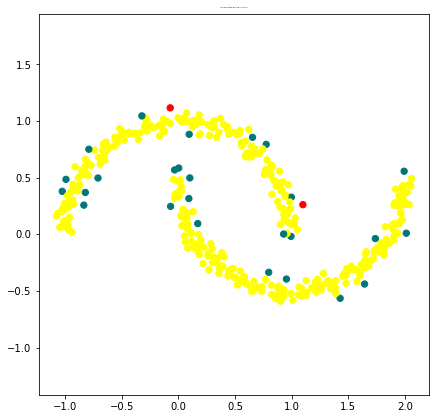

In [5]:
#Example of a set of points using minpts = 4 and check in different colors those that have high density and those who does not.
from sklearn.datasets.samples_generator import make_moons, make_blobs
import matplotlib.pyplot as plt


# Connectivity based clustering dataset
[X, y] = make_moons(n_samples=400, noise=.05, random_state=0)
epsilon = 0.1
minpts = 4

#Create similarity matrix
from scipy.spatial.distance import pdist,squareform
import numpy as np
#Create similarity matrix
d=squareform(pdist(X,'euclidean'))
d_eps=np.where(d<epsilon,1,0)
core = np.sum(d_eps,axis=0)

#Each point is always connected to itself. Thus we need to add one more point to the computation
colors=np.where(core>=minpts+1,'#FFFF00','#007777')
#Find outliers. Outliers are connected to themselves alone
colors = np.where(core<=1,'#FF0000',colors)

plt.scatter(X[:, 0], X[:, 1], c=colors, marker='o',s=40) 
plt.axis('equal')
plt.title('Connectivity-based clusters',size=2)
plt.gcf().set_size_inches((7,7))

Now let us connect the data points in clusters. In order to do so we have to define a new concept. We define **directly density-reachable** as follows: 
>An object q is directly density-reachable from object p if p is a core object and q is in p’s $\epsilon$-neighborhood.

We can build a chain of points that are directly reachable starting from a random point.

In [12]:
#Example of a set of points using minpts = 4 and check in different colors those that have high density and those who does not.
from sklearn.datasets.samples_generator import make_moons, make_blobs
import matplotlib.pyplot as plt


# Connectivity based clustering dataset
[X, y] = make_moons(n_samples=400, noise=.05, random_state=0)
epsilon = 0.2
minpts = 4

#Create similarity matrix
from scipy.spatial.distance import pdist,squareform
import numpy as np
#Create similarity matrix
d=squareform(pdist(X,'euclidean'))
d_eps=np.where(d<epsilon,1,0)
core = np.sum(d_eps,axis=0)


C:\Users\blair\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


We select a random point.

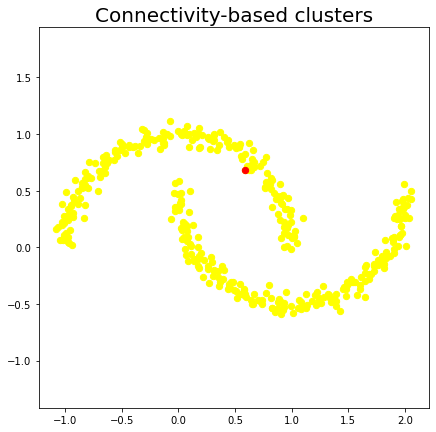

In [13]:
#Step 1: Select a random point.
from scipy import random
idx = random.randint(X.shape[0])

cluster = [idx]
to_visit = []
visited = []

plt.scatter(X[:, 0], X[:, 1], c='#FFFF00', marker='o',s=40) 
plt.scatter(X[idx, 0], X[idx, 1], c='#FF0000', marker='o',s=40) 
plt.axis('equal')
plt.title('Connectivity-based clusters',size=20)

plt.gcf().set_size_inches((7,7))

Check its $\epsilon$-neighborhood.

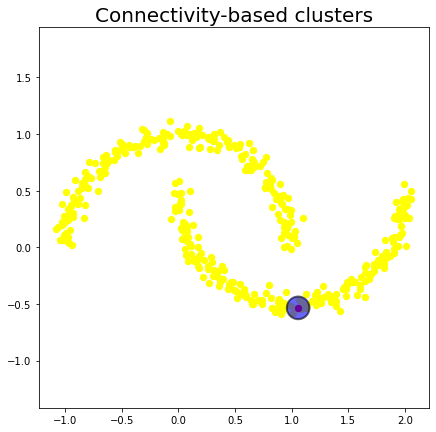

In [8]:
plt.scatter(X[:, 0], X[:, 1], c='#FFFF00', marker='o',s=40) 
plt.scatter(X[idx, 0], X[idx, 1], c='#FF0000', marker='o',s=40) 
plt.axis('equal')
plt.title('Connectivity-based clusters',size=20)

circle1=plt.Circle((X[idx, 0], X[idx, 1]),.1,linewidth=2,fill=True,alpha=0.6, facecolor = 'b',edgecolor='k')
fig = plt.gcf()
fig.gca().add_artist(circle1)


plt.gcf().set_size_inches((7,7))

Count the number of point inside the $\epsilon$-neighborhood, and see what kind of point it is (core, boundary, outlier). If it is core we label all directly reachable as members of the same class.

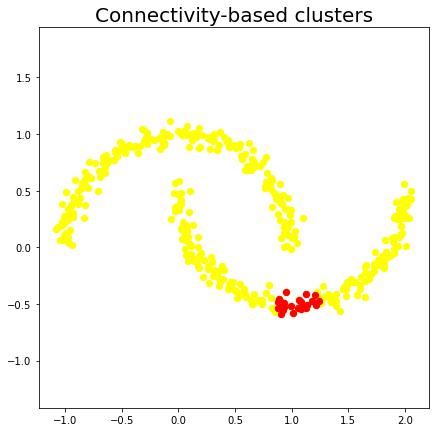

In [9]:
#Step 2: Label all points density reachable as members of the same class
cluster.extend(np.where(d_eps[:,idx])[0].tolist())
to_visit.extend(np.where(d_eps[:,idx])[0].tolist())
visited.extend([idx])
#Remove duplicates
cluster = list(set(cluster))
to_visit = list(set(cluster))
#Visualization
plt.scatter(X[:, 0], X[:, 1], c='#FFFF00', marker='o',s=40) 
plt.scatter(X[cluster, 0], X[cluster, 1], c='#FF0000', marker='o',s=40) 
plt.axis('equal')
plt.title('Connectivity-based clusters',size=20)
plt.gcf().set_size_inches((7,7))

Then we take a new point from the recently found cluster set and repeat the process.

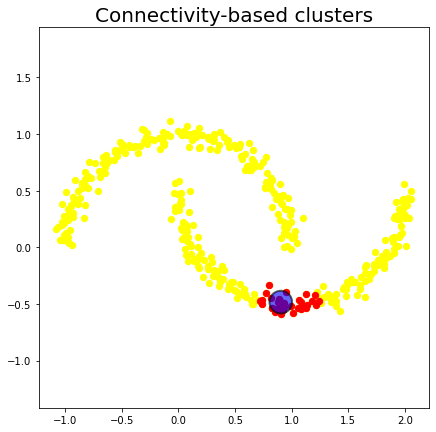

In [10]:
#Take the first element of the to_visit list and repeat
idx = to_visit.pop(0)

#Step 2: Label all points density reachable as members of the same class
cluster.extend(np.where(d_eps[:,idx])[0].tolist())
to_visit.extend(np.where(d_eps[:,idx])[0].tolist())
visited.extend([idx])
#Remove duplicates
cluster = list(set(cluster))
to_visit = list(set(to_visit))

#Visualization
circle1=plt.Circle((X[idx, 0], X[idx, 1]),.1,linewidth=2,fill=True,alpha=0.6, facecolor = 'b',edgecolor='k')
fig = plt.gcf()
fig.gca().add_artist(circle1)
plt.scatter(X[:, 0], X[:, 1], c='#FFFF00', marker='o',s=40) 
plt.scatter(X[cluster, 0], X[cluster, 1], c='#FF0000', marker='o',s=40) 
plt.axis('equal')
plt.title('Connectivity-based clusters',size=20)
plt.gcf().set_size_inches((7,7))

We can repeat this code while there are elements in the list and we will have a simplistic version of the DBSCAN technique. In order to have the complete version we should take into account the notions of CORE and OUTLIER. We should furthermore explore all points in the data set in order to find the different clusters.

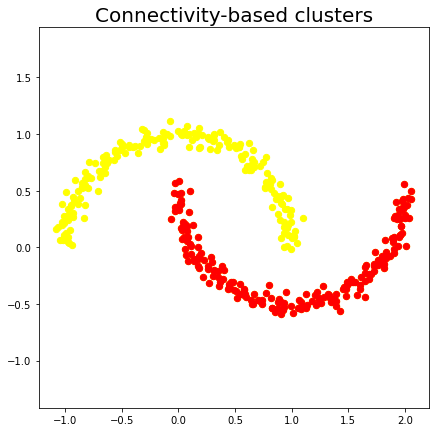

In [11]:
while len(to_visit)>0:    #Take the first element of the to_visit list and repeat
    idx = to_visit.pop(0)

    #Step 2: Label all points density reachable as members of the same class
    cluster.extend(np.where(d_eps[:,idx])[0].tolist())
    to_visit.extend([item for item in np.where(d_eps[:,idx])[0].tolist() if item not in visited])
    visited.extend([idx])
    cluster = list(set(cluster))
    to_visit = list(set(to_visit))

#Visualization
plt.scatter(X[:, 0], X[:, 1], c='#FFFF00', marker='o',s=40) 
plt.scatter(X[list(cluster), 0], X[list(cluster), 1], c='#FF0000', marker='o',s=40) 
plt.axis('equal')
plt.title('Connectivity-based clusters',size=20)
plt.gcf().set_size_inches((7,7))


<div class = "alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;"> **APPLICATIONS:**
<p>
The use of DBSCAN requires certain knowledge about the domain for setting the parameters $\epsilon$ and *MinPts*. One domain where these parameters can be easily undestood is geospatial clustering of geo-referenced data. In this case clustering answers the problem of finding smaller subgroups considering spatial proximity. A simple scenario would be to find the optimal area with more stores of a certain kind with the goal of minimize the travel time. Consider another problem where moving comsumes a certain resource (e.g. gas) and we need to refuel. We could ask, given a distribution of refuel stations which is the maximum distance I can move without running out of fuel? </p></div>


**DBSCAN PROS:**

+ Handles noise implicitly.
+ Can find clusters with different shapes.

**DBSCAN CONS:**

+ It is difficult to find the correct paramtererization for the technique to work well. Small values of $\epsilon$ tends to oversegment data. 
+ Can not adapt to clusters with different densities.


# Study case: Friday Night Life in New York

<img style = "border-radius:80px;" src="images/FNLf.jpg" width = 700 />

## Stating the problem
Let us apply our knowledge about clustering for discovering patterns in the behavior of people using geo-referenced data. Consider the New York Taxi trip data open data set. Using this data set we would like to find out where in New York people usually hang around on Friday night. Where are there popular areas in New York city? 

In order to do this, we will resort to analyzing where taxi drop off activity occurs at a certain time interval. For example, I would like to check all the drop off points of trips in Friday between 21:00h and 24:00h.

## About the data set

This dataset was obtained through a Freedom of Information Law (FOIL) request from the New York City Taxi & Limousine Commission (NYCT&L) by University of Illinois at Urbana-Champaign (http://publish.illinois.edu/dbwork/open-data/). We consider one year, 2013, of taxi operations in New York City and includes 180M trips. Data is stored in CSV format and organized as follows:

+ **medallion:** a permit to operate a yellow taxi cab in New York City, it is effectively a (randomly assigned) car ID.  See also medallions.
+ **hack license:** a license to drive the vehicle, it is effectively a (randomly assigned) driver ID. See also hack license.
+ **vender id:**  e.g., Verifone Transportation Systems (VTS), or Mobile Knowledge Systems Inc (CMT), implemented as part of the Technology Passenger Enhancements Project.
+ **rate_code:** taximeter rate, see NYCT&L description.
+ **store_and_fwd_flag:** unknown attribute.
+ **pickup_datetime:** start time of the trip, mm-dd-yyyy hh24:mm:ss EDT.
+ **dropoff_datetime:** end time of the trip, mm-dd-yyyy hh24:mm:ss EDT.
+ **passenger_count:** number of passengers on the trip, default value is one.
+ **trip time in secs:** trip time measured by the taximeter in seconds.
+ **trip distance:** trip distance measured by the taximeter in miles.
+ **pickup_longitude** and **pickup_latitude:** GPS coordinates at the start of the trip.
+ **dropoff longitude** and **dropoff latitude:** GPS coordinates at the end of the trip.


## Downloading Data

Note, this is a lot of data to download.  It's also a lot of data to serve.  You might consider grabbing this from a torrent instead.

In [12]:
# !wget https://nyctaxitrips.blob.core.windows.net/data/trip_data_{1,2,3,4,5,6,7,8,9,10,11,12}.csv.zip

For the sake of simplicity and time efficiency we will restrict our analysis to the first data chunck corresponding to a 14M trips during the month of January. Because the analysed data set fits in memory we will use Pandas for processing this chunk. In the case of processing the whole data set out-of-core techniques closely related to database technologies should be used. 

In [ ]:
%reset -f 
import pandas as pd
import numpy as np
import datetime

%time df = pd.read_csv('data/trip_data_1.csv', parse_dates=['pickup_datetime','dropoff_datetime'])

df.head(1)

In [ ]:
columns = ['dropoff_latitude','dropoff_longitude']
tmp= df[columns]
dtmp = tmp.ix[0:1000].values
dtmp = [list(x) for x in dtmp if x.any(0.0)]

In [ ]:
import gmaps
gmaps.heatmap(dtmp)

With a proper network connection we would obtain the following:
<img src = "images/gmap_dense.png" width=700/>

Manhattan is the drop off goal of most of the analysed taxis. We can see several spots in Brooklyn and Queens and a clear hot spot at La Guardia airport.

Let us slice and filter the dataframe according to the query we want to perform. In this case we would like to check the week day of a given date. We will use the **.weekday()** method of Timestamp or datetime data types. It returns an integer number 0 for Monday up to 6 for Sunday. We also have to check the dropoff hour. We may use the hour method. We are building a function that will check the condition for each row item. In order to apply this function for each column ite we will use the command **.map** as follows,

In [ ]:
def get_weekday(date):
    dat = date.weekday()
    hor = date.hour
    return dat>3 and dat<5 and hor>21

%time nl=df[df['dropoff_datetime'].map(get_weekday)]

From this selection we will project the data over the dropoff coordinates.

In [ ]:
columns = ['dropoff_latitude','dropoff_longitude']
fri = nl[columns]
fri.head()

If we check the values of the latitude and longitude we realize that there are non referenced data. Zero values in longitude or latitude. 

In [ ]:
#Remove zeros
sel = (np.abs(fri['dropoff_longitude'])>1e-3) & (np.abs(fri['dropoff_latitude'])>1e-3)
friclean = fri[sel]

Let us apply the clustering techniques we just described. Let us start by trying to model our goal in terms of parameters. DBSCAN is a nice technique for geo-referenced clustering because the $\epsilon$ parameter has a physical meaning. In this case it refers to the drop off area we consider is forming a cluster. 

In NYC:

   + 1 degree lat ~= 69.1703234284 miles
   + 1 degree lon ~= 52.3831781372 miles


<img src="images/NY_square_size.png" width = 700\>

NY squares measure 100m x 300m, (0.0621371 miles x 0.186411 miles). If we use $\epsilon$ = 0.07 miles radius/ 70 miles/degree ~= 1e-3. We may arbitrarily set the value of **MinPts** ot 500 in this case.

In [ ]:
from sklearn import cluster
data_fri = friclean.values
clu = cluster.DBSCAN(eps = 1e-3,min_samples=500)
%time y=clu.fit_predict(data_fri)
print "Fitting complete."

In [ ]:
%matplotlib inline
import pygmaps 
import numpy as np

#Create colour palette
n_clusters_ = len(np.unique(y)) 
import random
color = []
r = lambda: random.randint(0,255)
for i in xrange(n_clusters_):
    color.append('#%02X%02X%02X' % (r(),r(),r()))

mymap = pygmaps.maps(data_fri[0][0],data_fri[0][1], 12)
for i in xrange(len(y)):
    mymap.addpoint(data_fri[i][0],data_fri[i][1], color[y[i]]) 
    
mymap.draw('gmap_full.html') 

Open the HTML file just created. The map may last a little to load because of the 250K markers used on the map. Thus, I have just a screenshoot of the result. 

<img src = "images/gmap_full.png" width = 900/>

Well, this does not seem much informative. But let us zoom a little on Manhattan.
<img src="images/gmap_full_zoom.png" width=900/>

This looks a little more interesting. There seems to be some clusters but everything is so cluttered. Recall that in DBSCAN we have data belonging to CORE, BOUNDARY, and OUTLIERS. It turns out that purple markers are outliers. So let us try to visualize only CORE samples.

In [ ]:
#Draw only CORE samples
#Create colour palette
n_clusters_ = len(np.unique(y)) 
import random
color = []
r = lambda: random.randint(0,255)
for i in xrange(n_clusters_):
    color.append('#%02X%02X%02X' % (r(),r(),r()))


clu.components_
mymap = pygmaps.maps(data_fri[0][0],data_fri[0][1], 12)
y_core=y[clu.core_sample_indices_]
for i in xrange(len(y_core)):
    mymap.addpoint(clu.components_[i][0],clu.components_[i][1], color[y_core[i]]) 
    
mymap.draw('gmap_core.html') 

Let us see what it looks like.
<img src = "images/gmap_core.png" width = 900>

This is much more interesting. We see some areas that seem to be drop-off points. Let us zoom in a little more. 
<img src = "images/gmap_core_zoom1.png" width = 900>

And more. 
<img src = "images/gmap_core_zoom2_1.png" width = 500>
This is Manhanttan Lower East Side.
<img src = "images/gmap_core_zoom2_3.png" width = 500>
And Meatpack.
Observe that the clusters are not circular. What would have happened if we used k-means instead of DBSCAN?

Using a simple query on Tripadvisor forums:
    <img src = "images/NY_bar.png" width = 500/>